### EDA, FE and Linear Regression Models (Algerian Forest FiresDataset)

#### Dataset Link: https://archive.ics.uci.edu/ml/machine-learning-databases/00547/

### EDA and FE
- Data Profiling
- Stastical analysis
- Graphical Analysis
- Data Cleaning
- Data Encoding
- Data Scaling

### Regression Models
- Linear Regression
- Ridge Regression
- Lasso Regression
- Elastic-Net Regression
- Performance metrics for above models

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
%matplotlib inline
# To display maximum columns of dataframe on screen
pd.pandas.set_option('display.max_columns', None)

#### Loading the dataset

In [3]:
algerian=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
algerian

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


#### Feature details of the dataset
- RH: Relative Humidity
-  Ws: Wind Speed
- Rain: Rainfall
- FFMC: Fine Fuel Moisture Code
- DMC: Duff Moisture Code
- DC: Drought Code
- ISI: Initial Spread Index
- BUI: Buildup Index
- FWI: Fire Weather Index
- Classes: If there was an event of fire or not

#### This dataset contains data for two regions 'Bejaia' and 'Sidi-Bel Abbes' with separate headers. Need to modify the dataset to combine data for both regions under one header for the ease of analysis 

In [4]:
algerian.loc[121:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


##### Adding a new Column 'Region' to show the two regions and deleting the extra header and region name rows

In [5]:
algerian['Region']=''
algerian['Region'][:122]='Bejaia'
algerian

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,


In [6]:
algerian['Region'].loc[124:]='Sidi-Bel Abbes'
algerian.reset_index(inplace=True)

In [7]:
algerian

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
242,242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
243,243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
244,244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


### Basic info

In [8]:
algerian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        246 non-null    int64 
 1   day          246 non-null    object
 2   month        245 non-null    object
 3   year         245 non-null    object
 4   Temperature  245 non-null    object
 5    RH          245 non-null    object
 6    Ws          245 non-null    object
 7   Rain         245 non-null    object
 8   FFMC         245 non-null    object
 9   DMC          245 non-null    object
 10  DC           245 non-null    object
 11  ISI          245 non-null    object
 12  BUI          245 non-null    object
 13  FWI          245 non-null    object
 14  Classes      244 non-null    object
 15  Region       246 non-null    object
dtypes: int64(1), object(15)
memory usage: 30.9+ KB


In [9]:
algerian.shape

(246, 16)

#### Observation
- all of the features are object type. There are 244 rows and 16 columns in the dataset.

#### There are spaces in the feature names. Need to remove the spaces to avoid any error

In [11]:
for features in algerian.columns:
    algerian.rename(columns={features:features.strip(' ')},inplace=True)
algerian.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

#### Changing the feature types to float except for 'day', 'month', 'year' and 'Region' for ease of analysis. 'day', 'month', 'year' will be changed to int and 'Region' will remain as Object for now. We will see if it needs any change later.

In [60]:
for features in algerian.columns:
    if features in ['day', 'month', 'year']:
        algerian[features]=algerian[features].astype(int)
    elif features not in ['Region','Classes']:
        algerian[features]=algerian[features].astype(float)
algerian.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        243 non-null    float64
 1   day          243 non-null    int32  
 2   month        243 non-null    int32  
 3   year         243 non-null    int32  
 4   Temperature  243 non-null    float64
 5   RH           243 non-null    float64
 6   Ws           243 non-null    float64
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    object 
 15  Region       243 non-null    object 
dtypes: float64(11), int32(3), object(2)
memory usage: 29.4+ KB


#### Encoding the 'Classes' into int for better analysis
- 1 if 'fire'
- 0 if 'not fire'

In [61]:
algerian['Classes']=algerian['Classes'].apply(lambda x: x.strip(' '))
algerian['Classes_num']=algerian['Classes'].map({'not fire':0,'fire':1})
algerian.head(10)

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes_num
0,0.0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,0
1,1.0,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,0
2,2.0,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia,0
3,3.0,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia,0
4,4.0,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia,0
5,5.0,6,6,2012,31.0,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,Bejaia,1
6,6.0,7,6,2012,33.0,54.0,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,Bejaia,1
7,7.0,8,6,2012,30.0,73.0,15.0,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,Bejaia,1
8,8.0,9,6,2012,25.0,88.0,13.0,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,Bejaia,0
9,9.0,10,6,2012,28.0,79.0,12.0,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,Bejaia,0


In [62]:
#### Separating Numerical and Categorical features
numeric_features=[f for f in algerian.columns if algerian[f].dtype!='O']
categorical_features=[f for f in algerian.columns if algerian[f].dtype=='O']
print('numerical features:',numeric_features,'\ncategorical features',categorical_features)

numerical features: ['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes_num'] 
categorical features ['Classes', 'Region']


### Statistical Analysis

In [63]:
algerian[numeric_features].describe()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_num
count,243.000000,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,122.316872,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786
std,71.540562,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938
min,0.000000,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,60.500000,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,121.000000,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,184.500000,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,245.000000,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


#### Covariance of numeric features

In [64]:
algerian[numeric_features].cov()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_num
index,5118.052070,78.464374,38.278271,0.0,56.422627,-401.269292,-34.367871,-4.509703,233.760893,229.527642,192.275717,83.613786,184.341855,134.692458,6.279291
day,78.464374,78.190729,-0.003639,0.0,3.119138,-9.969476,1.188603,-1.993174,28.544043,53.863133,222.524339,6.632060,65.061368,23.079143,0.891321
month,38.278271,-0.003639,1.242764,0.0,-0.229653,-0.681903,-0.124987,0.077762,0.272433,0.938676,6.722457,0.303838,1.349400,0.685464,0.013298
year,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Temperature,56.422627,3.119138,-0.229653,0.0,13.162670,-35.043482,-2.901949,-2.372850,35.222858,21.837668,65.071727,9.101371,23.734918,15.297068,0.930330
RH,-401.269292,-9.969476,-0.681903,0.0,-35.043482,219.874333,10.173809,6.604836,-137.215388,-75.071928,-160.400449,-42.298446,-74.653741,-64.096917,-3.184454
Ws,-34.367871,1.188603,-0.124987,0.0,-2.901949,10.173809,7.903887,0.965886,-6.718952,-0.025120,10.604530,0.099643,1.257586,0.677079,-0.097745
Rain,-4.509703,-1.993174,0.077762,0.0,-2.372850,6.604836,0.965886,4.012837,-15.634746,-7.169025,-28.456455,-2.891688,-8.546509,-4.835502,-0.377380
FFMC,233.760893,28.544043,0.272433,0.0,35.222858,-137.215388,-6.718952,-15.634746,205.912204,107.342972,347.051372,44.113113,120.872510,73.791799,5.487161
DMC,229.527642,53.863133,0.938676,0.0,21.837668,-75.071928,-0.025120,-7.169025,107.342972,153.587434,517.427748,35.032228,173.203205,80.764530,3.606817


#### Standard Deviation

In [65]:
algerian[numeric_features].std()

index          7.154056e+01
day            8.842552e+00
month          1.114793e+00
year           2.278430e-13
Temperature    3.628039e+00
RH             1.482816e+01
Ws             2.811385e+00
Rain           2.003207e+00
FFMC           1.434964e+01
DMC            1.239304e+01
DC             4.766561e+01
ISI            4.154234e+00
BUI            1.422842e+01
FWI            7.440568e+00
Classes_num    4.969382e-01
dtype: float64

In [66]:
#### Correlation of Numeric features
algerian[numeric_features].corr()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_num
index,1.000000,0.124035,0.479961,NaN,0.217385,-0.378265,-0.170876,-0.031468,0.227708,0.258884,0.056385,0.281342,0.181099,0.253037,0.176627
day,0.124035,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840
month,0.479961,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.217385,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015
RH,-0.378265,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161
Ws,-0.170876,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964
Rain,-0.031468,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097
FFMC,0.227708,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492
DMC,0.258884,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658


#### Observation
- Temperature, FFMC, DMC, DC, ISI, BUI, FWI are highly positively correlated with cases of fire
- RH, Ws, Rain are negatively correlated with cases of fire

### Graphical Analysis

#### Region wise fire cases

In [67]:
data_fire_cases=algerian.groupby('Classes')['Region'].value_counts()
data_fire_cases

Classes   Region        
fire      Sidi-Bel Abbes    78
          Bejaia            59
not fire  Bejaia            63
          Sidi-Bel Abbes    43
Name: Region, dtype: int64

#### Plotting region wise fire cases

<AxesSubplot:xlabel='Classes', ylabel='count'>

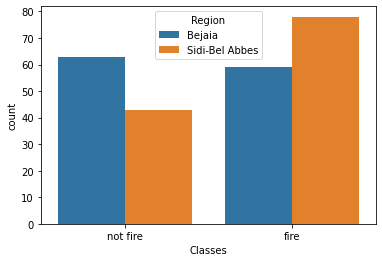

In [68]:
sns.countplot(data=algerian, x='Classes', hue='Region')

In [69]:
#checking numerical values
algerian[numeric_features].nunique()

index          243
day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            125
Classes_num      2
dtype: int64

### Continuous and discrete numerical features

In [72]:
continuous_features=[features for features in algerian.columns if len(algerian[features].unique())>35]
discrete_features=[features for features in algerian.columns if len(algerian[features].unique())<35]
print('continuous_features:',continuous_features,'\ndiscrete_features',discrete_features)

continuous_features: ['index', 'RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'] 
discrete_features ['day', 'month', 'year', 'Temperature', 'Ws', 'Classes', 'Region', 'Classes_num']


### distribution of numeric features

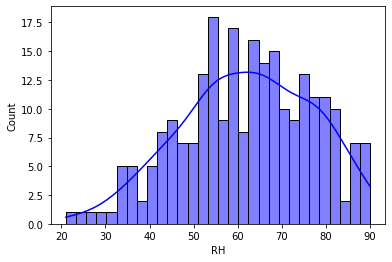

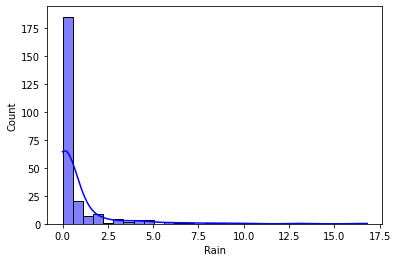

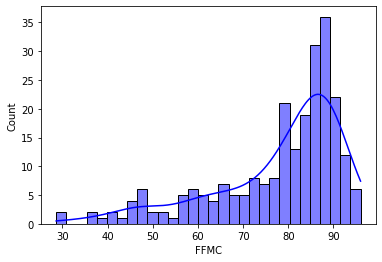

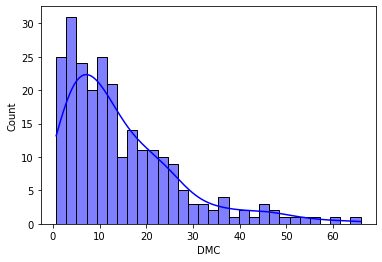

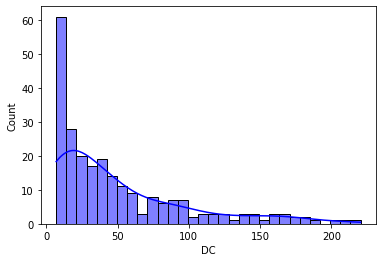

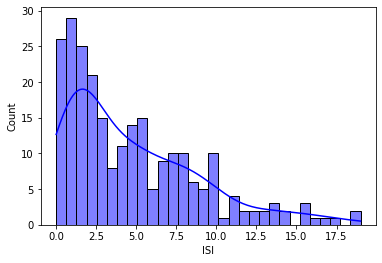

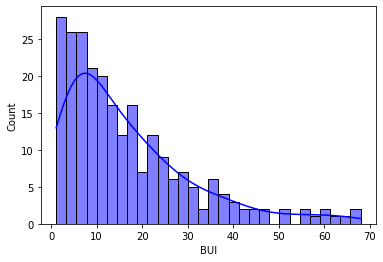

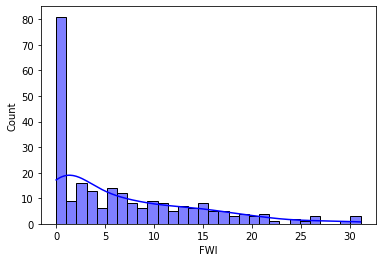

In [75]:
for features in continuous_features:
    if features!='index':
        sns.histplot(data=algerian, x=features,kde=True, bins=30, color='blue')
        plt.show()

#### Observation
- RH is normally distributed
- DC, ISI, BUI, FWI are all right skwed

### plotting discrete features against target feature 'Classes'

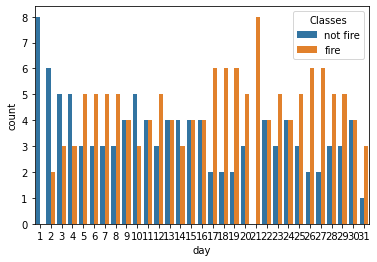

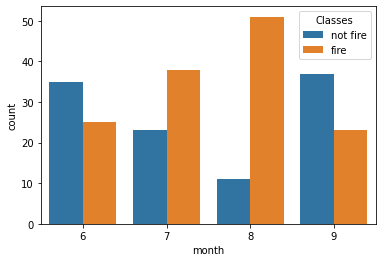

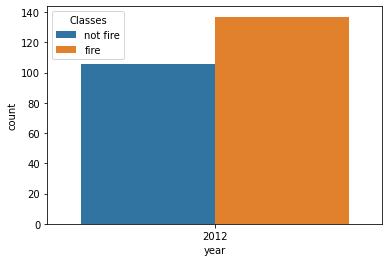

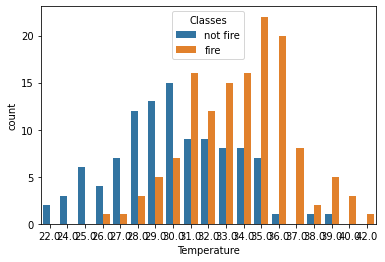

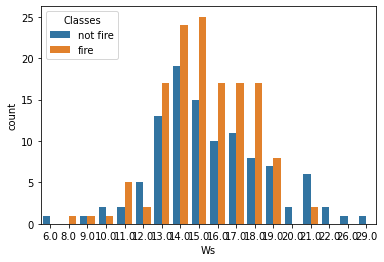

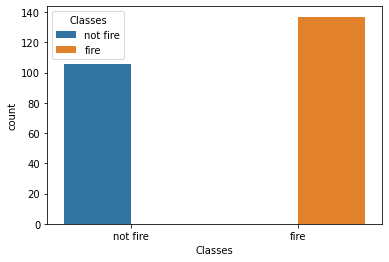

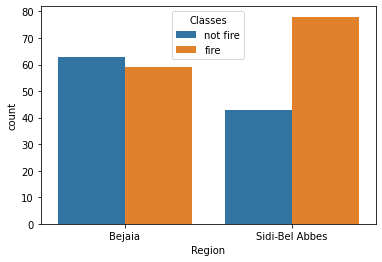

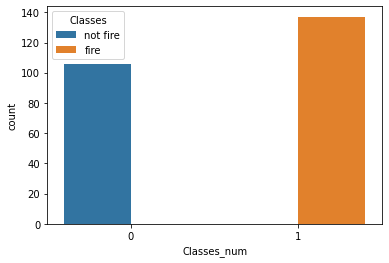

In [76]:
for features in discrete_features:
    sns.countplot(data=algerian, x=features, hue='Classes')
    plt.show()

#### Observation
- almost all days of the month had fire cases
- August had most number of fire cases compared to rest of  the months
- fire cases outnumbered no fire cases
- there is a rise of fire cases with rising temperature
- Side-Bel Abbes sees has more fire cases than no fire cases

### Checking Outliers

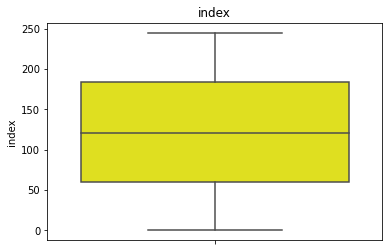

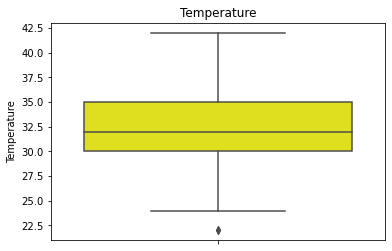

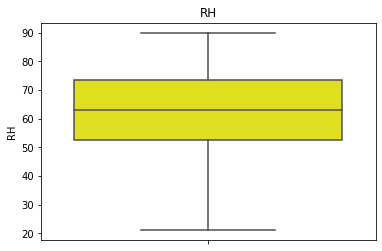

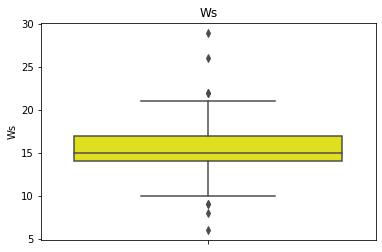

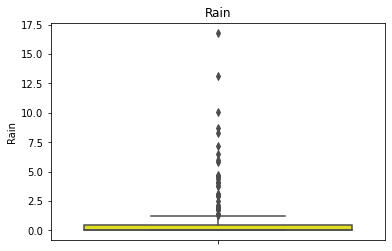

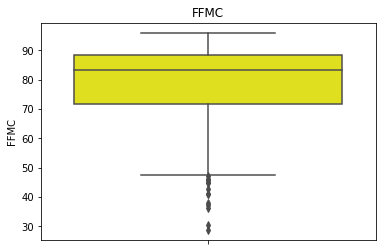

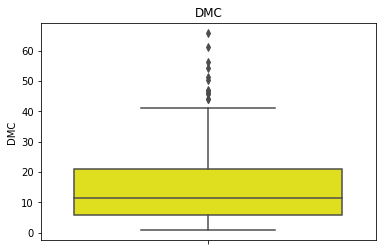

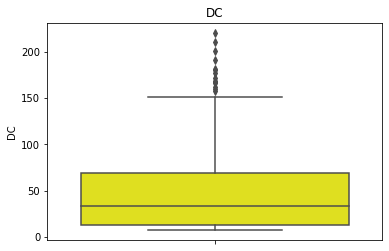

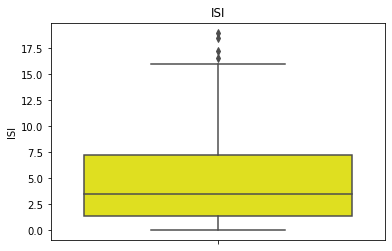

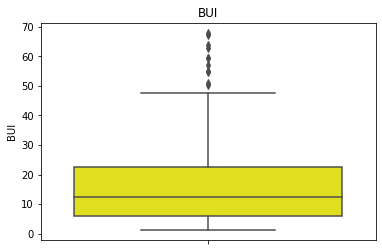

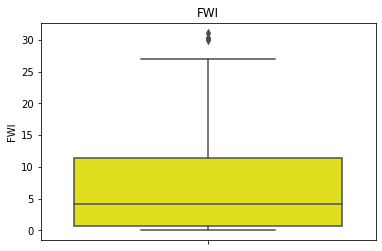

In [77]:
for features in [features for features in numeric_features if features not in ['day', 'month','year', 'Classes_num']]:
    sns.boxplot(data=algerian,y=features,color='yellow')
    plt.title(features)
    plt.show() 

#### Observation
- all the features have outliers except Temperature

#### Correlation between numerical features

In [78]:
data= round(algerian[[feature for feature in numeric_features if feature not in ['index','day', 'month','year', 'Region','Classes_num']]].corr(),2)
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.00,-0.65,-0.28,-0.33,0.68,0.49,0.38,0.60,0.46,0.57
RH,-0.65,1.00,0.24,0.22,-0.64,-0.41,-0.23,-0.69,-0.35,-0.58
Ws,-0.28,0.24,1.00,0.17,-0.17,-0.00,0.08,0.01,0.03,0.03
Rain,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32
FFMC,0.68,-0.64,-0.17,-0.54,1.00,0.60,0.51,0.74,0.59,0.69
DMC,0.49,-0.41,-0.00,-0.29,0.60,1.00,0.88,0.68,0.98,0.88
DC,0.38,-0.23,0.08,-0.30,0.51,0.88,1.00,0.51,0.94,0.74
ISI,0.60,-0.69,0.01,-0.35,0.74,0.68,0.51,1.00,0.64,0.92
BUI,0.46,-0.35,0.03,-0.30,0.59,0.98,0.94,0.64,1.00,0.86
FWI,0.57,-0.58,0.03,-0.32,0.69,0.88,0.74,0.92,0.86,1.00


#### Visualise the correlation through heatmap

<AxesSubplot:>

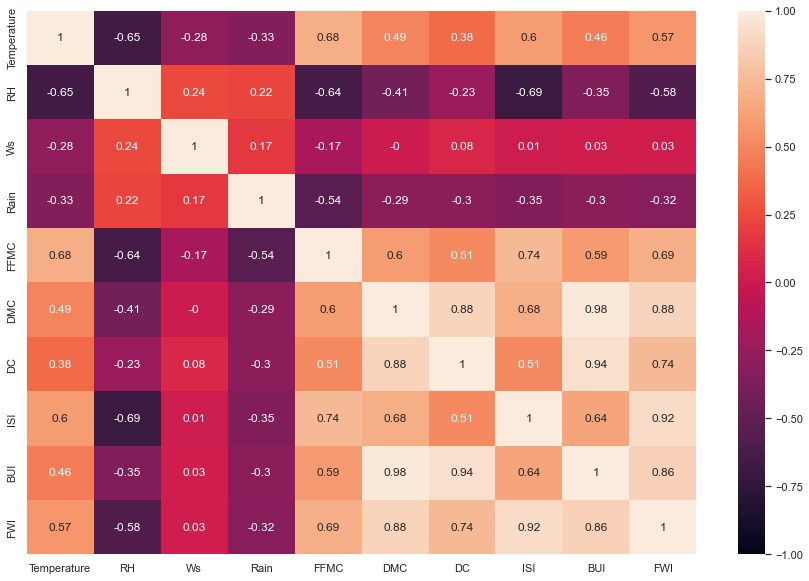

In [79]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=data, annot=True, vmin=-1, vmax=1)

#### Observation
- highly co-related DMC-BUI, DMC-DC, ISI-FWI, BUI-FWI
- moderately co-related FWI-DC, ISI-DC, ISI-BUI
- negatively co-related Rain-Temperature, FFMC-RH, ISI-RH, FWI-RH, ISI-Rain

#### Relation between numerical features and target feature

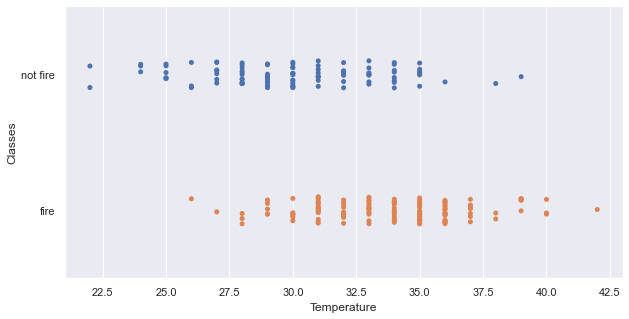

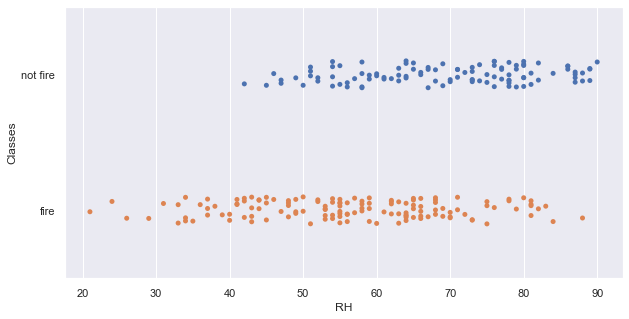

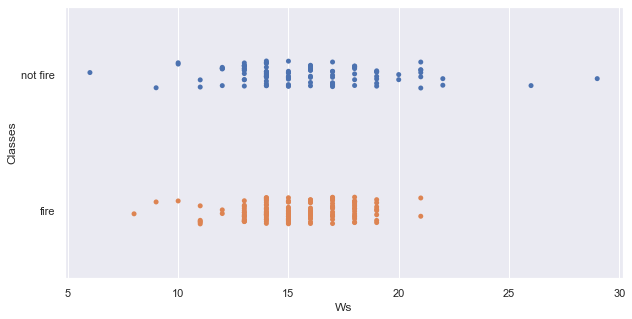

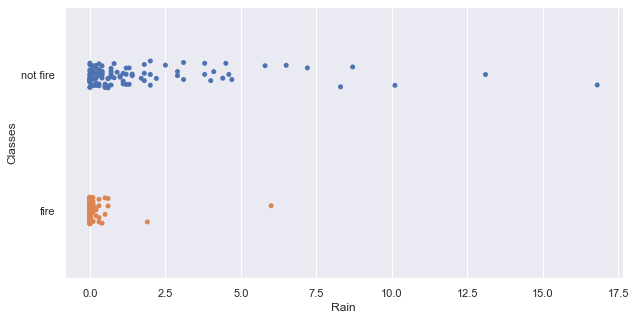

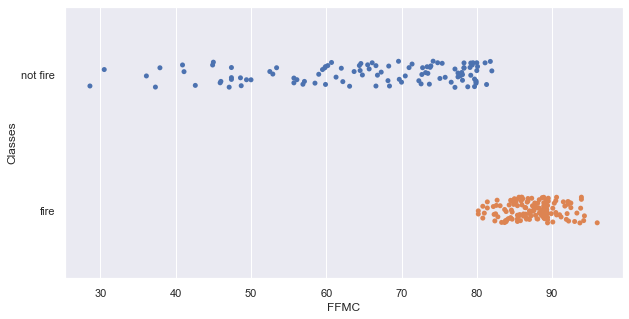

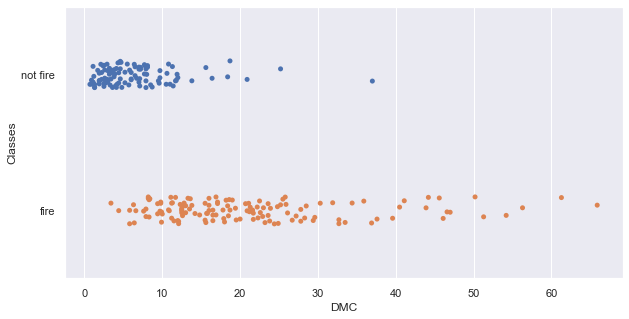

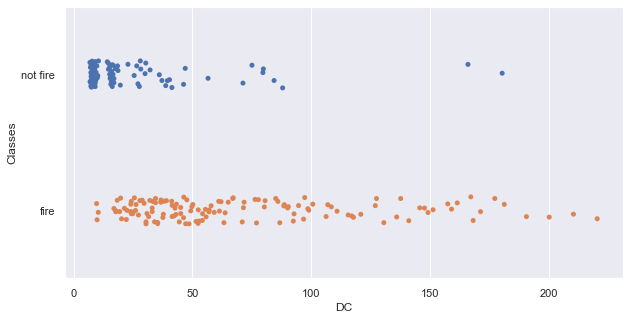

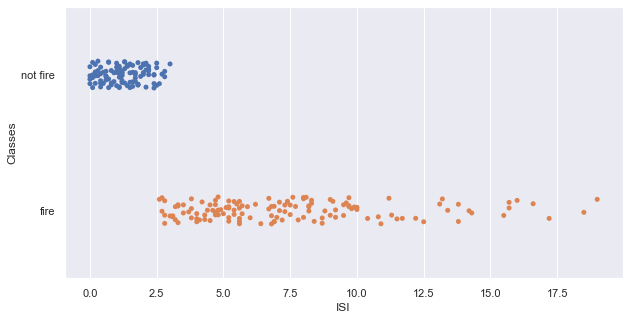

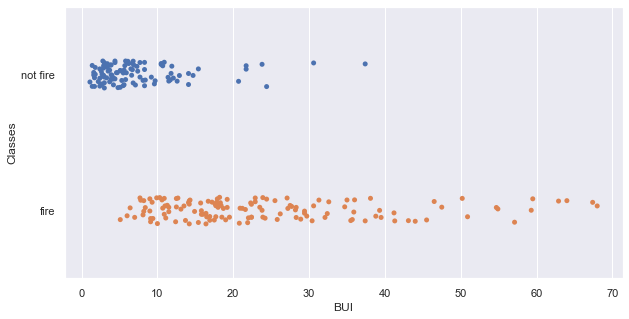

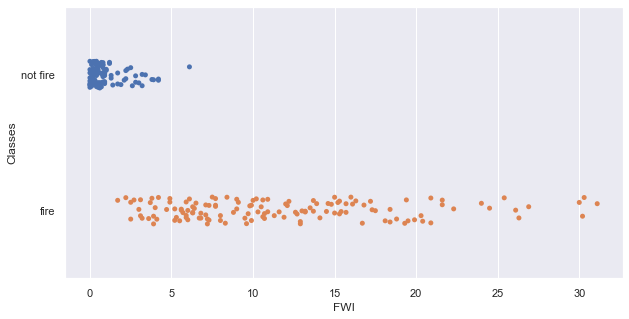

In [80]:
num_feature_custom=[feature for feature in numeric_features if feature not in ['index','day', 'month', 'year', 'Region','Classes_num']]
sns.set(rc={'figure.figsize':(10,5)})
for feature in num_feature_custom:
 sns.stripplot(data=algerian, x=feature, y='Classes')
 plt.show();

#### Special observation for the month of August when most fire cases occured

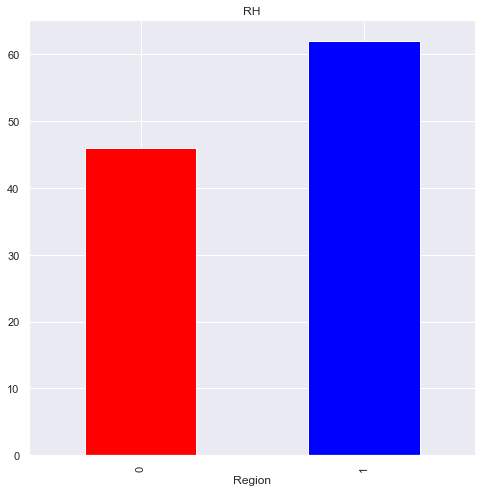

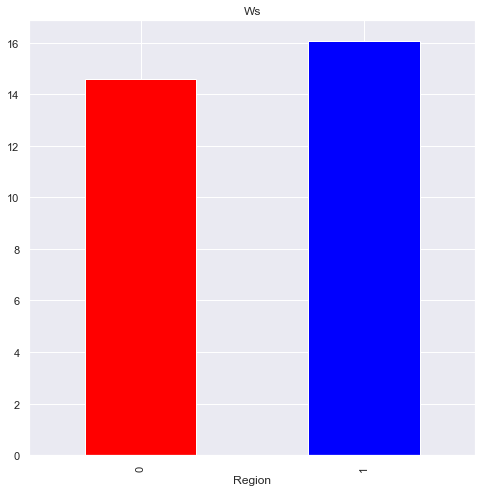

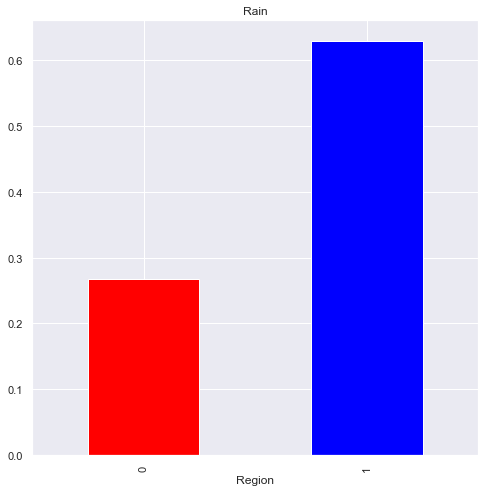

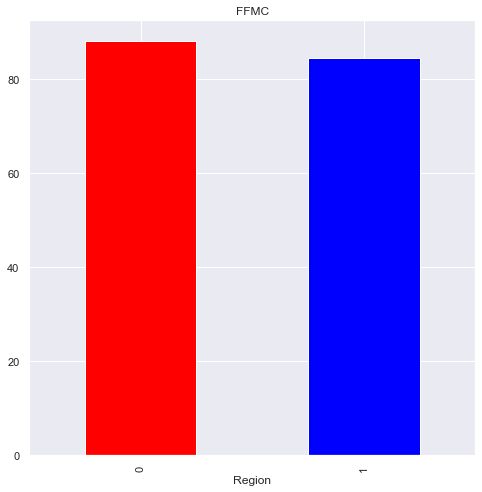

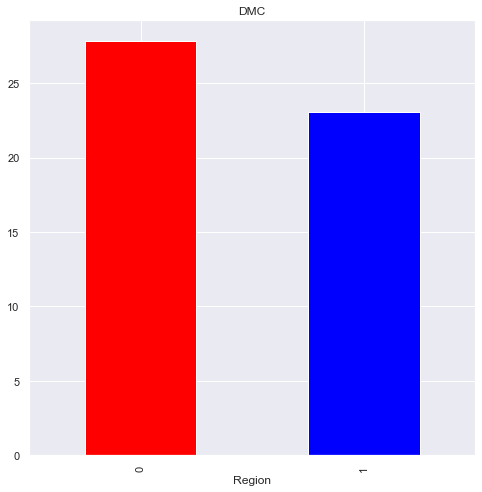

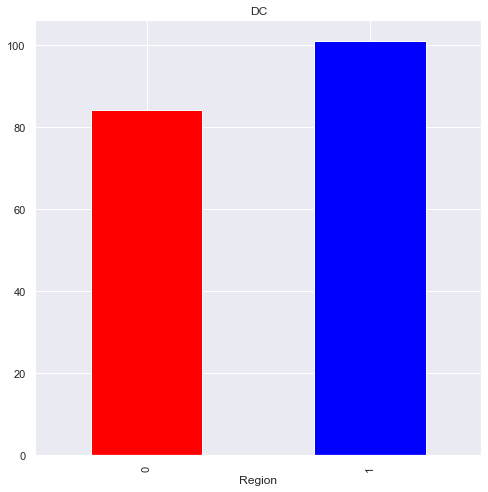

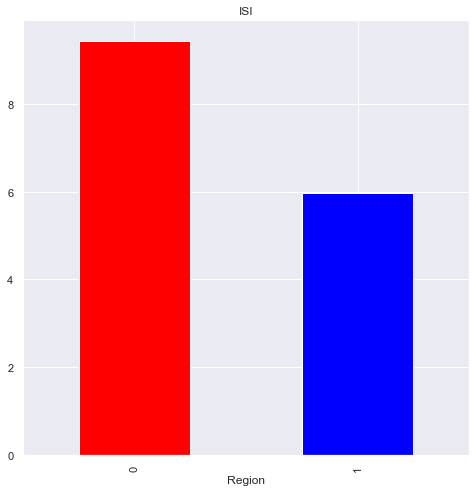

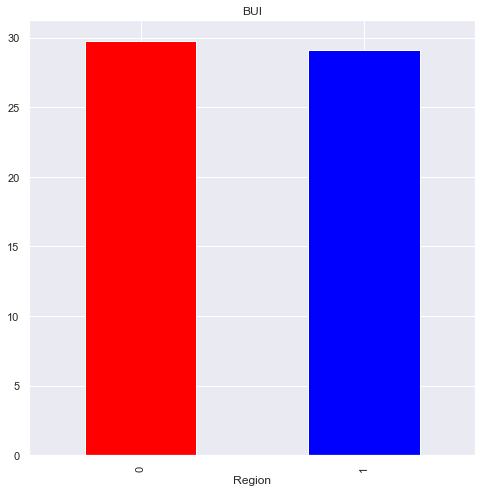

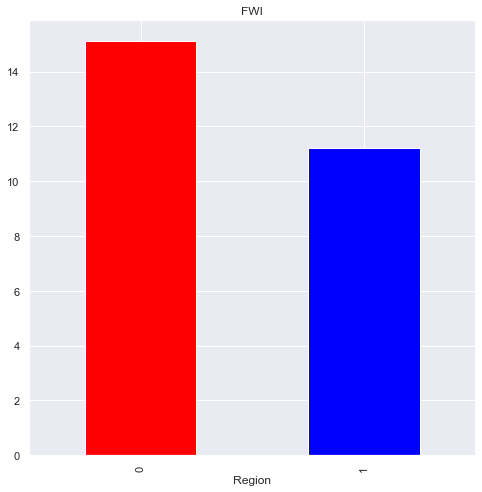

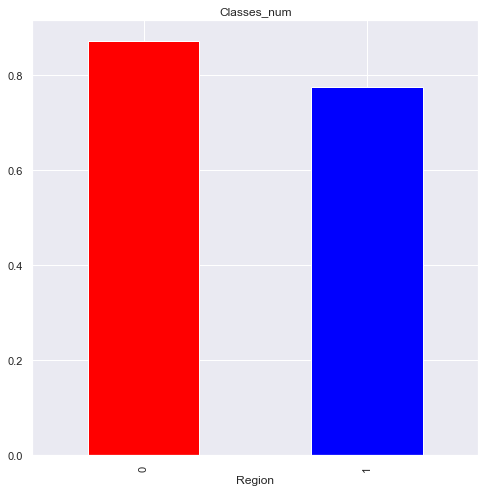

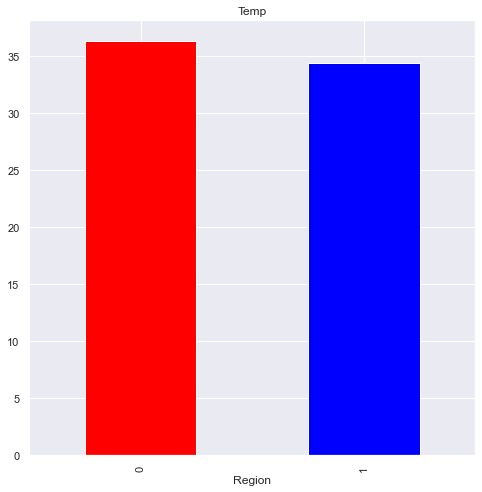

In [173]:
aug_data=algerian[algerian['month']==8].groupby('Region').mean().iloc[::,3:]
for features in range(len(aug_data.columns)):
    aug_data.iloc[::,features].plot.bar(color=['red','blue','pink','yellow','green','grey'])
    plt.xlabel='Region'
    plt.ylabel=aug_data.columns[features]
    plt.title(aug_data.columns[features])
    plt.show()

#### Plotting regression for all features against target feature Temperature

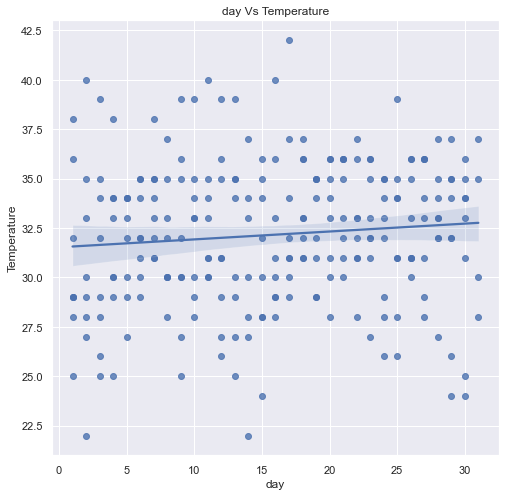

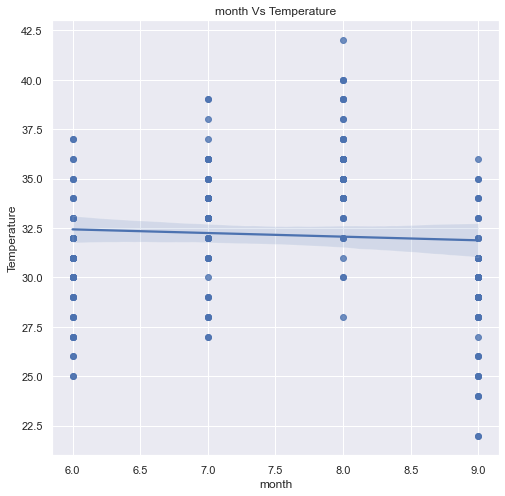

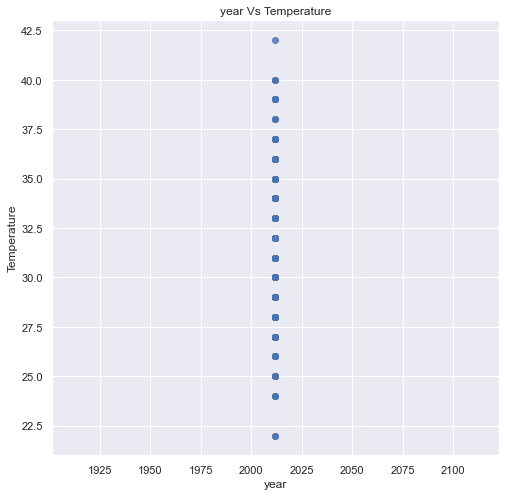

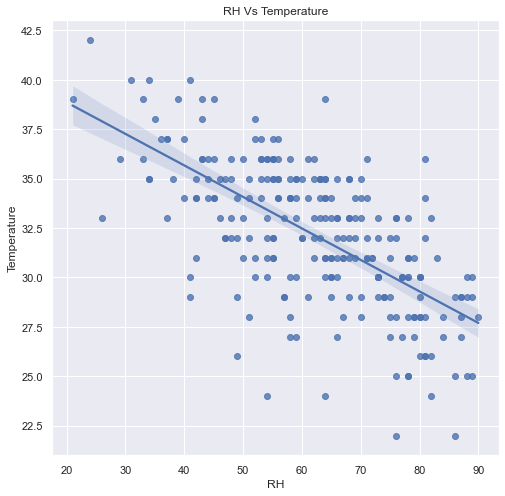

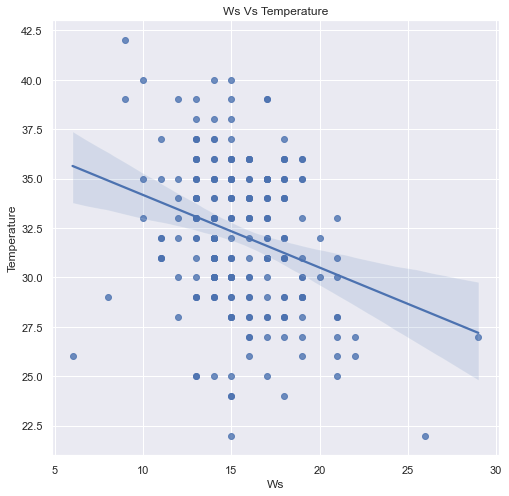

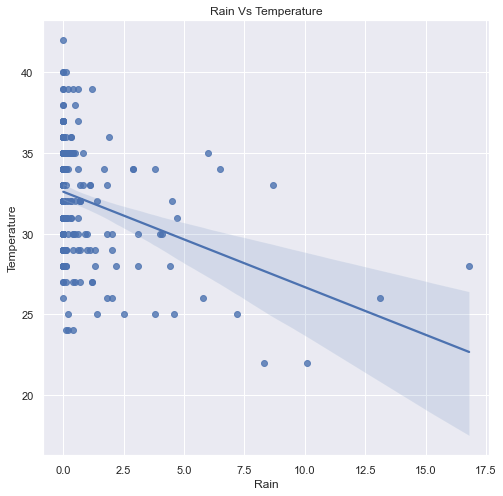

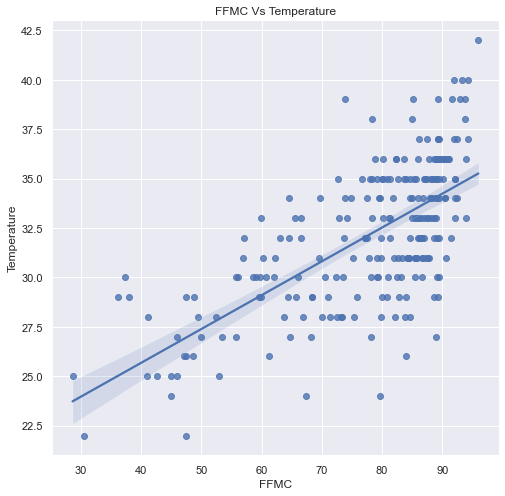

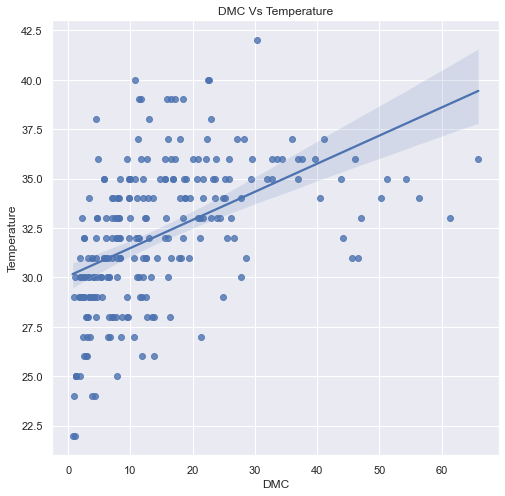

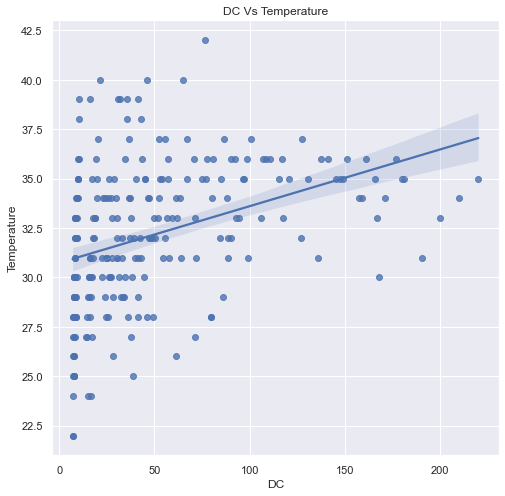

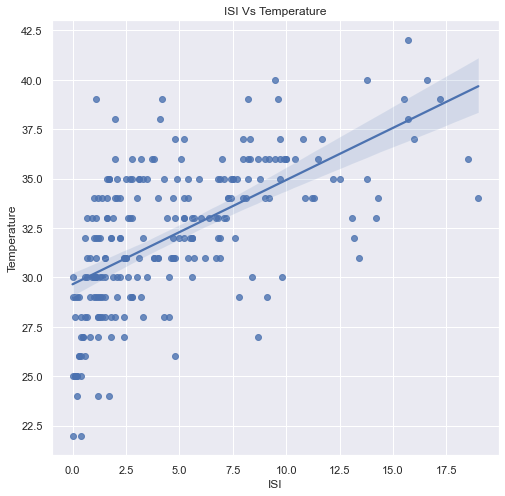

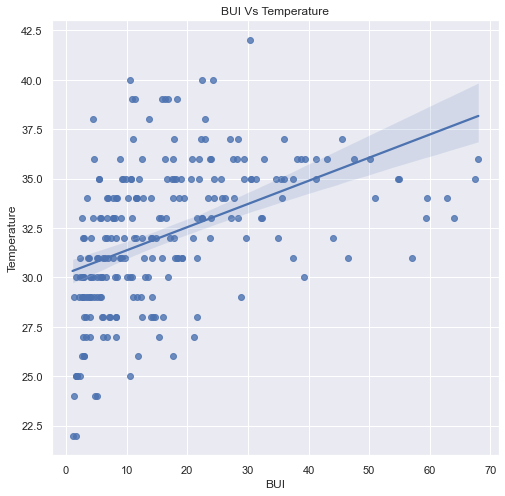

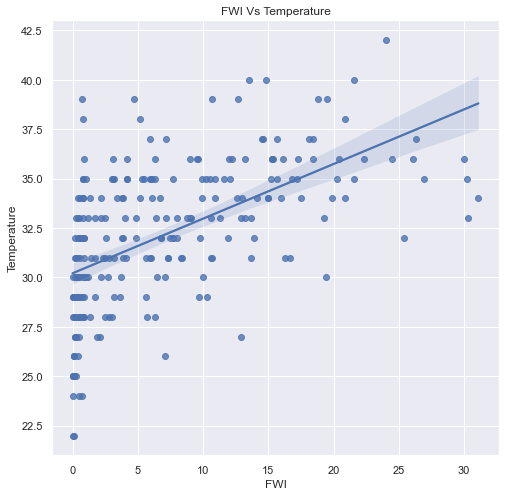

In [116]:
for feature in [feature for feature in algerian.columns if feature not in ['Temperature','Region','Classes','Classes_num']]:
    sns.set(rc={'figure.figsize':(8,8)})
    sns.regplot(x=algerian[feature], y=algerian['Temperature'])
    plt.title("{} Vs Temperature".format(feature))
    plt.show()

#### Final Report
- Most fire cases occured between 28-40 temperature range
- More the rain, lesser the fire cases
- 80-90 FFMC range sees most fire cases
- Most fire cases occured between 13-19 wind speed
- Maximum cases of fire occured in the month of August
- Most cases of fire occured between ISI range 2.5-7.5
- Average temperature in Aug was around 35 for both regions
- Average Rainfall in Sidi-Bel Abbes was lesser than that in Bejaia

### Model Building Preparation

#### Separating independent (X) and dependant features (y)

In [121]:
algerian.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Classes_num,Temp
0,1,6,2012,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,0,29.0
1,2,6,2012,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,0,29.0
2,3,6,2012,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia,0,26.0
3,4,6,2012,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia,0,25.0
4,5,6,2012,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia,0,27.0


In [141]:
#removing the Classes feature since we have already encoded it as Classes_numm
algerian.drop(columns='Classes',inplace=True)

In [144]:
#Encoding the Region feature 1 for Bejaia and 0 for Sidi-Bel Abbes
algerian['Region']=algerian['Region'].map({'Bejaia':1,'Sidi-Bel Abbes':0},)

In [145]:
algerian

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_num,Temp
0,1,6,2012,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0,29.0
1,2,6,2012,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0,29.0
2,3,6,2012,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0,26.0
3,4,6,2012,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0,25.0
4,5,6,2012,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1,30.0
240,27,9,2012,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,0,28.0
241,28,9,2012,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,0,27.0
242,29,9,2012,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,0,24.0


In [146]:
X=algerian.iloc[:,:-1]
y=algerian.iloc[:,-1]

In [147]:
X

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_num
0,1,6,2012,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
240,27,9,2012,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,0
241,28,9,2012,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,0
242,29,9,2012,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,0


In [148]:
y.head()

0    29.0
1    29.0
2    26.0
3    25.0
4    27.0
Name: Temp, dtype: float64

#### Splitting data into Training and Test data

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=50)

In [151]:
X_train.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_num
100,9,9,2012,77.0,15.0,1.0,56.1,2.1,8.4,0.7,2.6,0.2,1,0
61,1,8,2012,45.0,14.0,0.0,78.8,4.8,10.2,2.0,4.7,0.9,1,0
140,19,6,2012,67.0,14.0,4.5,64.6,4.4,8.2,1.0,4.2,0.4,0,0
183,1,8,2012,52.0,14.0,0.0,78.3,4.4,10.5,2.0,4.4,0.8,0,0
99,8,9,2012,73.0,17.0,0.9,62.0,2.6,8.4,1.1,3.0,0.4,1,0


In [152]:
X_test.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_num
97,6,9,2012,74.0,19.0,0.1,75.8,3.6,32.2,2.1,5.6,0.9,1,0
16,17,6,2012,89.0,16.0,0.6,37.3,1.1,7.8,0.0,1.6,0.0,1,0
240,27,9,2012,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,0
20,21,6,2012,78.0,14.0,0.0,81.0,6.3,31.6,2.6,8.4,2.2,1,1
216,3,9,2012,75.0,16.0,0.0,82.2,4.4,24.3,3.3,6.0,2.5,0,1


In [153]:
y_test.head()

97     29.0
16     30.0
240    28.0
20     30.0
216    28.0
Name: Temp, dtype: float64

In [154]:
y_train.head()

100    30.0
61     36.0
140    32.0
183    38.0
99     30.0
Name: Temp, dtype: float64

In [155]:
#both train datas should have same shape
print(X_train.shape, y_train.shape)

(162, 14) (162,)


In [156]:
#both test datas should have same shape
print(X_test.shape, y_test.shape)

(81, 14) (81,)


#### Standardization/Feature Scaling of the dataset

In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
# creating a standard object
scaler=StandardScaler()

In [159]:
# standardising the train data using fit_transform
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.80545208,  1.36632915,  0.        , ..., -0.94949242,
         1.01242284, -1.13211755],
       [-1.6999387 ,  0.46287886,  0.        , ..., -0.85259498,
         1.01242284, -1.13211755],
       [ 0.3126562 , -1.34402174,  0.        , ..., -0.92180744,
        -0.9877296 , -1.13211755],
       ...,
       [ 0.20084538, -1.34402174,  0.        , ..., -0.92180744,
        -0.9877296 , -1.13211755],
       [-0.47001959,  1.36632915,  0.        , ..., -0.43732021,
        -0.9877296 ,  0.8833005 ],
       [ 1.095332  , -0.44057144,  0.        , ..., -0.83875249,
        -0.9877296 , -1.13211755]])

In [160]:
X_test=scaler.fit_transform(X_test)
X_test

array([[-1.04282877,  1.30808727,  0.        , ..., -0.779297  ,
         0.96362411, -1.14642301],
       [ 0.24946669, -1.36304892,  0.        , ..., -0.89450842,
         0.96362411, -1.14642301],
       [ 1.42428074,  1.30808727,  0.        , ..., -0.89450842,
        -1.03774904, -1.14642301],
       ...,
       [ 1.65924355,  0.41770854,  0.        , ...,  2.97147477,
         0.96362411,  0.87227838],
       [ 0.36694809, -0.47267019,  0.        , ...,  0.27040705,
        -1.03774904,  0.87227838],
       [ 1.42428074,  1.30808727,  0.        , ..., -0.36965639,
         0.96362411,  0.87227838]])

### Model Building

#### Linear Regression

In [161]:
from sklearn.linear_model import LinearRegression

In [162]:
#creating a linear regression instance
linear_reg=LinearRegression()

In [163]:
#passing the train datas to the model
linear_reg.fit(X_train,y_train)

LinearRegression()

In [164]:
### printing the co-efficients of the best fit hyperplane
print('co-efficient is', linear_reg.coef_)
print('intercept is', linear_reg.intercept_)

co-efficient is [-2.74948024e-01 -3.15180016e-01  2.22044605e-16 -9.14831348e-01
 -6.47039034e-01  1.73858466e-01  1.67065828e+00  4.73172665e-01
  7.49838405e-01 -6.60603607e-01 -4.27860915e-01  1.63849687e-01
 -1.61088270e-01  2.09932300e-02]
intercept is 32.04320987654321


#### Using Linear Regression to predict the test data

In [165]:
linear_reg_pred=linear_reg.predict(X_test)
linear_reg_pred

array([29.9057578 , 26.33698393, 26.90444991, 31.86620633, 31.48948233,
       26.33478277, 31.37064952, 32.25435543, 31.14409213, 31.09982034,
       34.98249699, 32.68554758, 33.71803959, 29.9085836 , 33.63918179,
       34.94755229, 31.53748638, 34.4878004 , 34.58550543, 36.04587718,
       35.18929442, 30.06305522, 33.08616259, 32.99401876, 31.99651981,
       27.03787343, 31.95755571, 32.30439261, 26.45978045, 31.83554454,
       31.59235373, 33.06478687, 34.14232771, 33.36364329, 32.25776151,
       32.0642209 , 30.45587708, 28.98211127, 32.37184339, 32.7688702 ,
       36.37633435, 35.26859933, 31.85250753, 33.34377611, 30.60999057,
       33.13820791, 31.67172032, 30.99293119, 33.74902804, 29.43107303,
       34.9735829 , 32.87148926, 33.20572033, 29.48681666, 31.20511205,
       28.09322841, 27.00413057, 34.01971104, 27.3031675 , 34.50724643,
       33.23257199, 34.59316802, 34.37202329, 32.66384804, 33.59182824,
       32.66793623, 37.25348581, 32.16794912, 31.2556486 , 31.76

### Validating the model using the assumptions of Linear Regression

#### Linear Relationships 

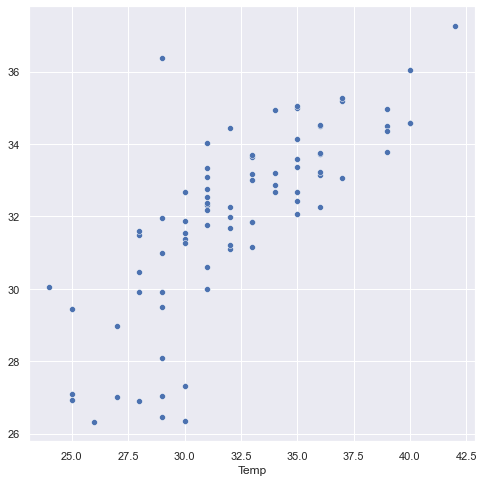

In [174]:
#test truth data and predicted data should have linear relationshiop as an indication of good model
sns.scatterplot(x=y_test,y=linear_reg_pred)
plt.show()

#### Residual distribution

In [176]:
#Residual should follow normal distribution as an indication of good model
residual_linear_reg=linear_reg_pred-y_test
residual_linear_reg.head()

97     0.905758
16    -3.663016
240   -1.095550
20     1.866206
216    3.489482
Name: Temp, dtype: float64

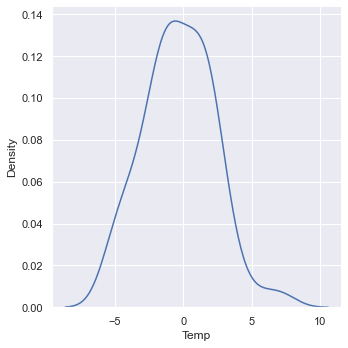

In [177]:
sns.displot(x=residual_linear_reg,kind='kde')

#### Residual vs Predicted distribution (Uniform Distribution)

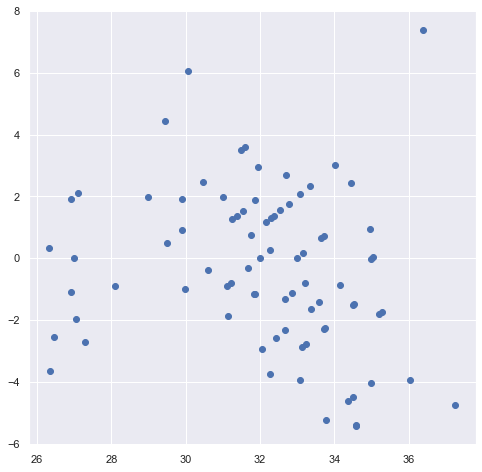

In [178]:
## Uniform distribution between residual and predicted data indicates a good model
plt.scatter(x=linear_reg_pred,y=residual_linear_reg)
plt.show()

#### Performance Matrix (Cost Function Values)

#### MSE, MAE & RMSE

In [197]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [202]:
print('Mean Squared Error is', round(mean_squared_error(y_test,linear_reg_pred),3))
print( 'Mean Absolute Error is', round(mean_absolute_error(y_test,linear_reg_pred),3))
print('Root Mean Squared Error is', round(np.sqrt(mean_absolute_error(y_test,linear_reg_pred)),3))

Mean Squared Error is 6.738
Mean Absolute Error is 2.087
Root Mean Squared Error is 1.445


#### R Square and Adjusted R Square Values

In [179]:
from sklearn.metrics import r2_score

In [186]:
linear_reg_r2=r2_score(y_test,linear_reg_pred)
print('Linear regression R square value is',round(linear_reg_r2*100.00,3))
adj_linear_reg_r2=1-((1-linear_reg_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Adjusted R2 score is',round(adj_linear_reg_r2*100.00,3))

Linear regression R square value is 56.229
Adjusted R2 score is 46.944


### Ridge Regression

In [187]:
from sklearn.linear_model import Ridge

In [188]:
#creating a ridge regression instance
ridge_reg=Ridge()

In [189]:
#passing the train datas to the model
ridge_reg.fit(X_train,y_train)

Ridge()

In [190]:
### printing the co-efficients of the best fit hyperplane
print('co-efficient is', ridge_reg.coef_)
print('intercept is', ridge_reg.intercept_)

co-efficient is [-0.27064316 -0.31460549  0.         -0.9106907  -0.65598386  0.15353414
  1.57402704  0.28902505  0.62307786 -0.42023368  0.00603234 -0.12831981
 -0.16515481  0.03143643]
intercept is 32.04320987654321


#### Using Ridge Regression to predict the temperature

In [191]:
ridge_reg_pred=ridge_reg.predict(X_test)
ridge_reg_pred

array([29.8528949 , 26.43491132, 26.99356922, 31.85379241, 31.46096193,
       26.28767727, 31.32926361, 32.19489843, 31.1555972 , 31.11462511,
       34.95936832, 32.69860725, 33.64741787, 29.94799866, 33.59717464,
       34.97205737, 31.51418175, 34.44981019, 34.64915478, 35.9967973 ,
       35.16311586, 30.0775919 , 33.05325358, 32.96217551, 31.97954059,
       27.16139756, 31.9382471 , 32.26161128, 26.56651474, 31.82999942,
       31.57458666, 32.97798751, 34.13342793, 33.32280103, 32.21374383,
       32.02708165, 30.4159248 , 29.06030482, 32.32059021, 32.74679088,
       36.44407839, 35.18517959, 31.81277661, 33.35673678, 30.54936568,
       33.06184894, 31.66548291, 30.95890146, 33.77614385, 29.54412009,
       34.94805205, 32.82894369, 33.13162473, 29.52333711, 31.23009889,
       28.18127648, 27.05887685, 33.99009309, 27.28488198, 34.51259932,
       33.17978667, 34.60581978, 34.37029599, 32.61217714, 33.65443791,
       33.16209154, 37.18890331, 32.09823961, 31.24254135, 31.76

#### Validating the model using the assumptions of Ridge Regression

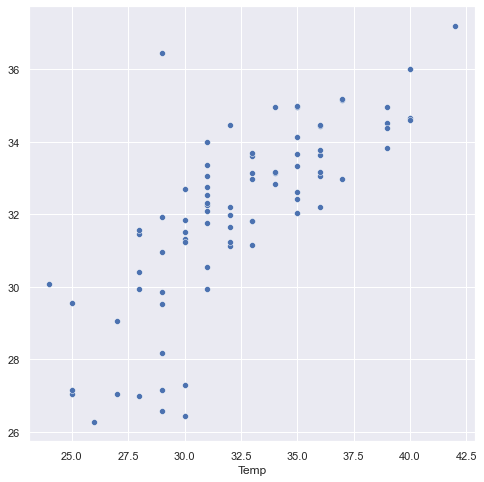

In [192]:
#test truth data and predicted data should have linear relationshiop as an indication of good model
sns.scatterplot(x=y_test,y=ridge_reg_pred)
plt.show()

#### Residual distribution

In [193]:
ridge_reg_residual=ridge_reg_pred-y_test
y_test.head()

97     29.0
16     30.0
240    28.0
20     30.0
216    28.0
Name: Temp, dtype: float64

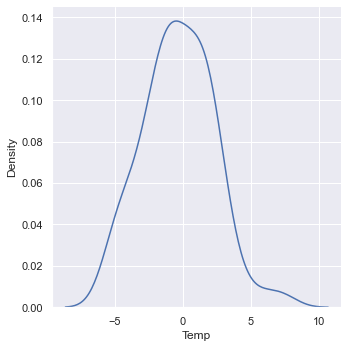

In [194]:
#Residual should follow normal distribution as an indication of good model
sns.displot(x=ridge_reg_residual,kind='kde')

#### Residual vs Predicted distribution (Uniform Distribution)

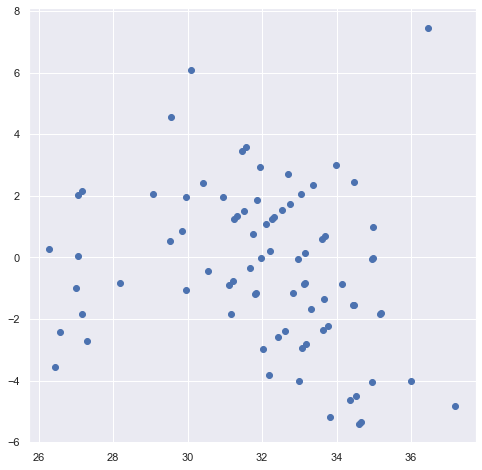

In [195]:
## Uniform distribution between residual and predicted data indicates a good model
plt.scatter(x=ridge_reg_pred,y=ridge_reg_residual)
plt.show()

#### Performance Matrix (Cost Function Values)

#### MSE, MAE & RMSE

In [209]:
print('Mean Squared Error is', round(mean_squared_error(y_test,ridge_reg_pred),3))
print( 'Mean Absolute Error is', round(mean_absolute_error(y_test,ridge_reg_pred),3))
print('Root Mean Squared Error is', round(np.sqrt(mean_absolute_error(y_test,ridge_reg_pred)),3))

Mean Squared Error is 6.761
Mean Absolute Error is 2.085
Root Mean Squared Error is 1.444


#### R Square and Adjusted R Square Values

In [207]:
ridge_reg_r2=r2_score(y_test,ridge_reg_pred)
print('Ridge regression R square value is',round(ridge_reg_r2*100.00,3))
adj_ridge_reg_r2=1-((1-ridge_reg_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Adjusted R2 score is',round(adj_ridge_reg_r2*100.00,3))

Ridge regression R square value is 56.08
Adjusted R2 score is 46.764


### Lasso Regression

In [210]:
from sklearn.linear_model import Lasso

In [211]:
#creating a ridge regression instance
lasso_reg=Lasso()

In [212]:
#passing the train datas to the model
lasso_reg.fit(X_train,y_train)

Lasso()

In [213]:
### printing the co-efficients of the best fit hyperplane
print('co-efficient is', lasso_reg.coef_)
print('intercept is', lasso_reg.intercept_)

co-efficient is [ 0.         -0.          0.         -0.30980216 -0.         -0.
  1.11435206  0.          0.          0.          0.          0.
 -0.          0.        ]
intercept is 32.04320987654321


#### Using Lasso Regression to predict the temperature

In [221]:
lasso_reg_pred=lasso_reg.predict(X_test)
lasso_reg_pred

array([31.77007312, 28.84339622, 29.14196119, 32.0528658 , 32.19136547,
       29.7695547 , 32.09620497, 32.31524317, 31.23097359, 31.24964256,
       32.68652983, 31.77910961, 33.03907822, 30.85267395, 32.68935721,
       32.89168065, 31.7613138 , 33.8544425 , 33.71985126, 33.49980131,
       33.19443123, 31.37243922, 32.70607197, 32.61373886, 32.39100011,
       28.76090347, 31.22908867, 32.40663382, 28.94064951, 31.94011738,
       32.24433712, 33.10883393, 32.57755125, 32.74536413, 32.61373886,
       32.03042698, 31.87325835, 30.13686364, 32.71294636, 32.9988436 ,
       32.94297527, 33.7325883 , 32.09707814, 32.61663553, 30.92850018,
       32.94869932, 32.24433712, 32.09512393, 32.52726839, 29.9344709 ,
       33.44184018, 32.90745295, 32.31632422, 29.79509807, 30.54056806,
       29.57504812, 29.80978932, 32.94971108, 30.52479576, 33.94192472,
       33.00666045, 33.83772774, 32.95766652, 32.8475376 , 32.3937582 ,
       33.2267797 , 34.09214967, 32.5224175 , 31.96929201, 31.70

#### Validating the model using the assumptions of Lasso Regression

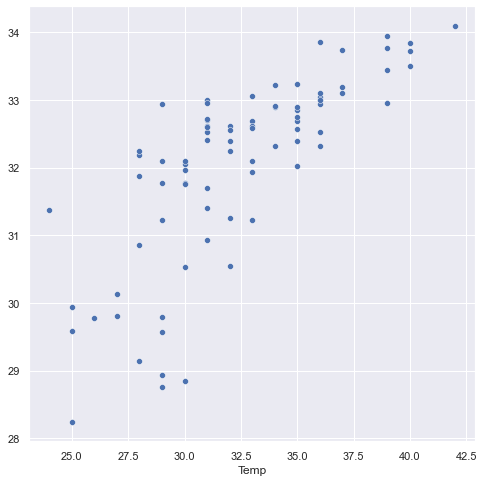

In [222]:
#test truth data and predicted data should have linear relationshiop as an indication of good model
sns.scatterplot(x=y_test,y=lasso_reg_pred)
plt.show()

#### Residual distribution

In [223]:
lasso_reg_residual=lasso_reg_pred-y_test
lasso_reg_residual.head()

97     2.770073
16    -1.156604
240    1.141961
20     2.052866
216    4.191365
Name: Temp, dtype: float64

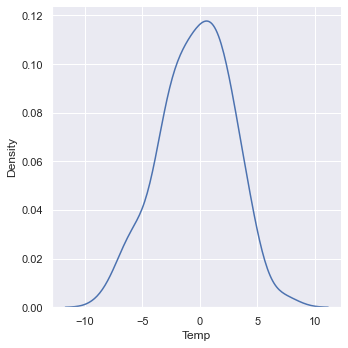

In [224]:
#Residual should follow normal distribution as an indication of good model
sns.displot(x=lasso_reg_residual,kind='kde')

#### Residual vs Predicted distribution (Uniform Distribution)

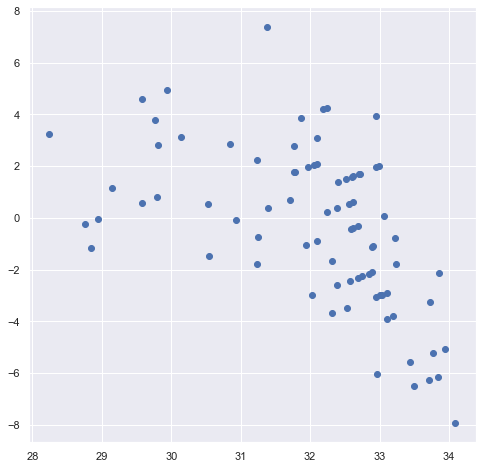

In [225]:
## Uniform distribution between residual and predicted data indicates a good model
plt.scatter(x=lasso_reg_pred,y=lasso_reg_residual)
plt.show()

#### Performance Matrix (Cost Function Values)

#### MSE, MAE & RMSE

In [226]:
print('Mean Squared Error is', round(mean_squared_error(y_test,lasso_reg_pred),3))
print( 'Mean Absolute Error is', round(mean_absolute_error(y_test,lasso_reg_pred),3))
print('Root Mean Squared Error is', round(np.sqrt(mean_absolute_error(y_test,lasso_reg_pred)),3))

Mean Squared Error is 9.292
Mean Absolute Error is 2.456
Root Mean Squared Error is 1.567


#### R Square and Adjusted R Square Values

In [227]:
lasso_reg_r2=r2_score(y_test,lasso_reg_pred)
print('Lasso regression R square value is',round(lasso_reg_r2*100.00,3))
adj_lasso_reg_r2=1-((1-lasso_reg_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Adjusted R2 score is',round(adj_lasso_reg_r2*100.00,3))

Lasso regression R square value is 39.638
Adjusted R2 score is 26.833


### Elastic-Net Regression

In [228]:
from sklearn.linear_model import ElasticNet

In [229]:
#creating an Elastic-Net regression instance
elasticnet_reg=ElasticNet()

In [230]:
#passing the train datas to the model
elasticnet_reg.fit(X_train,y_train)

ElasticNet()

In [231]:
### printing the co-efficients of the best fit hyperplane
print('co-efficient is', elasticnet_reg.coef_)
print('intercept is', elasticnet_reg.intercept_)

co-efficient is [ 0.         -0.          0.         -0.51569428 -0.27595865 -0.
  0.76878905  0.15266016  0.          0.0354452   0.10281831  0.0205983
 -0.          0.09609453]
intercept is 32.04320987654321


#### Using Elastic-Net Regression to predict the temperature

In [232]:
elasticnet_reg_pred=elasticnet_reg.predict(X_test)
elasticnet_reg_pred

array([30.87431704, 28.83399533, 29.28939849, 31.80328877, 31.69731063,
       29.10519063, 31.79684086, 31.99569496, 31.27784114, 31.23228207,
       33.04687835, 31.91884081, 33.1621725 , 30.44012254, 32.83865266,
       33.45361152, 31.45887565, 34.33658985, 33.93872817, 34.32150947,
       33.71038778, 31.21163882, 32.61027407, 32.45337951, 32.39573468,
       29.11959318, 31.38311158, 32.0031323 , 28.95240996, 31.64224916,
       31.91535833, 32.8781919 , 32.78541801, 32.76737334, 32.22378294,
       31.82756779, 31.05125792, 30.01289704, 32.36742423, 32.96120675,
       34.14741024, 34.44632086, 31.6967458 , 32.8476612 , 30.58695387,
       32.84371296, 31.85926223, 31.60588234, 32.82146795, 30.09062706,
       33.88544822, 32.51014173, 32.07161143, 29.89840367, 30.80453017,
       29.54464262, 29.15336686, 33.41605174, 29.68633614, 34.17788442,
       33.04583603, 34.24107367, 33.23806552, 32.59588244, 32.69952723,
       33.4148956 , 35.36224018, 32.10536897, 31.56949232, 31.54

#### Validating the model using the assumptions of Lasso Regression

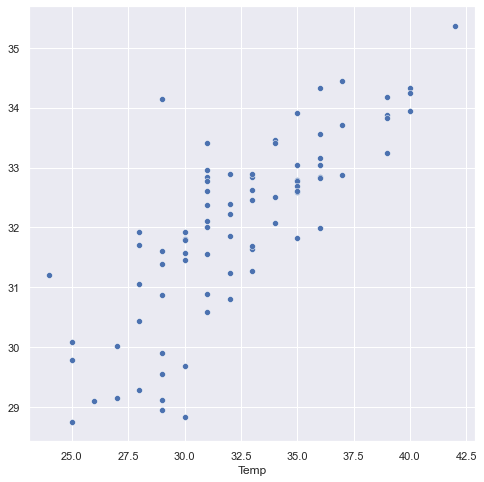

In [233]:
#test truth data and predicted data should have linear relationshiop as an indication of good model
sns.scatterplot(x=y_test,y=elasticnet_reg_pred)
plt.show()

#### Residual distribution

In [234]:
elasticnet_reg_residual=y_test-elasticnet_reg_pred
elasticnet_reg_residual.head()

97    -1.874317
16     1.166005
240   -1.289398
20    -1.803289
216   -3.697311
Name: Temp, dtype: float64

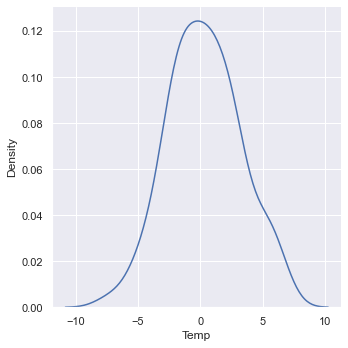

In [235]:
#Residual should follow normal distribution as an indication of good model
sns.displot(x=elasticnet_reg_residual,kind='kde')

#### Residual vs Predicted distribution (Uniform Distribution)

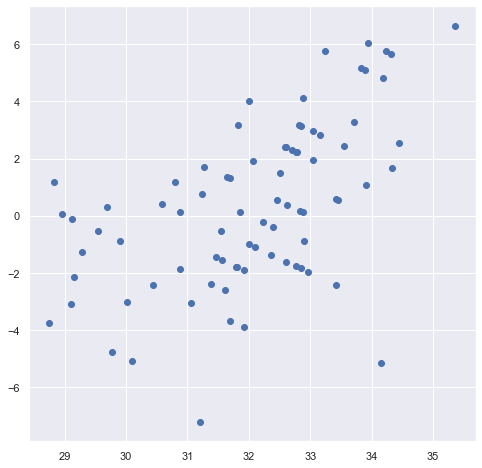

In [236]:
## Uniform distribution between residual and predicted data indicates a good model
plt.scatter(x=elasticnet_reg_pred,y=elasticnet_reg_residual)
plt.show()

#### Performance Matrix (Cost Function Values)

#### MSE, MAE & RMSE

In [237]:
print('Mean Squared Error is', round(mean_squared_error(y_test,elasticnet_reg_pred),3))
print( 'Mean Absolute Error is', round(mean_absolute_error(y_test,elasticnet_reg_pred),3))
print('Root Mean Squared Error is', round(np.sqrt(mean_absolute_error(y_test,elasticnet_reg_pred)),3))

Mean Squared Error is 8.362
Mean Absolute Error is 2.322
Root Mean Squared Error is 1.524


#### R Square and Adjusted R Square Values

In [238]:
elasticnet_reg_r2=r2_score(y_test,elasticnet_reg_pred)
print('Elastic-Net regression R square value is',round(elasticnet_reg_r2*100.00,3))
adj_elasticnet_reg_r2=1-((1-elasticnet_reg_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Adjusted R2 score is',round(adj_elasticnet_reg_r2*100.00,3))

Elastic-Net regression R square value is 45.68
Adjusted R2 score is 34.157


### Comparison of all models

#### MSE

In [239]:
print('Mean Squared Error for Linear Regression is', round(mean_squared_error(y_test,linear_reg_pred),3))
print('Mean Squared Error for Ridge Regression is', round(mean_squared_error(y_test,ridge_reg_pred),3))
print('Mean Squared Error is for Lasso Regression is', round(mean_squared_error(y_test,lasso_reg_pred),3))
print('Mean Squared Error is for Elastic-Net Regression is', round(mean_squared_error(y_test,elasticnet_reg_pred),3))

Mean Squared Error for Linear Regression is 6.738
Mean Squared Error for Ridge Regression is 6.761
Mean Squared Error is for Lasso Regression is 9.292
Mean Squared Error is for Elastic-Net Regression is 8.362


#### MAE

In [240]:
print('Mean Absolute Error for Linear Regression is', round(mean_absolute_error(y_test,linear_reg_pred),3))
print('Mean Absolute Error for for Ridge Regression is', round(mean_absolute_error(y_test,ridge_reg_pred),3))
print('Mean Absolute Error for Lasso Regression is', round(mean_absolute_error(y_test,lasso_reg_pred),3))
print('Mean Absolute Error for Elastic-Net Regression is', round(mean_absolute_error(y_test,elasticnet_reg_pred),3))

Mean Absolute Error for Linear Regression is 2.087
Mean Absolute Error for for Ridge Regression is 2.085
Mean Absolute Error for Lasso Regression is 2.456
Mean Absolute Error for Elastic-Net Regression is 2.322


#### RMSE

In [241]:
print('Root Mean Squared Error for Linear Regression is', round(np.sqrt(mean_absolute_error(y_test,linear_reg_pred)),3))
print('Root Mean Squared Error for Ridge Regression is', round(np.sqrt(mean_absolute_error(y_test,ridge_reg_pred)),3))
print('Root Mean Squared Error for Lasso Regression is', round(np.sqrt(mean_absolute_error(y_test,lasso_reg_pred)),3))
print('Root Mean Squared Error for Elastic-Net Regression is', round(np.sqrt(mean_absolute_error(y_test,elasticnet_reg_pred)),3))

Root Mean Squared Error for Linear Regression is 1.445
Root Mean Squared Error for Ridge Regression is 1.444
Root Mean Squared Error for Lasso Regression is 1.567
Root Mean Squared Error for Elastic-Net Regression is 1.524


#### R Squared Values

In [242]:
print('Linear regression R square value is',round(linear_reg_r2*100.00,3))
print('Ridge regression R square value is',round(ridge_reg_r2*100.00,3))
print('Lasso regression R square value is',round(lasso_reg_r2*100.00,3))
print('Elastic-Net regression R square value is',round(elasticnet_reg_r2*100.00,3))

Linear regression R square value is 56.229
Ridge regression R square value is 56.08
Lasso regression R square value is 39.638
Elastic-Net regression R square value is 45.68


#### Adjuated R Squared Values

In [243]:
print('Adjusted R2 score for Linear Regression is',round(adj_linear_reg_r2*100.00,3))
print('Adjusted R2 score for Ridge Regression is',round(adj_ridge_reg_r2*100.00,3))
print('Adjusted R2 score for Lasso Regression is',round(adj_lasso_reg_r2*100.00,3))
print('Adjusted R2 score for Elastic-Net Regression is',round(adj_elasticnet_reg_r2*100.00,3))

Adjusted R2 score for Linear Regression is 46.944
Adjusted R2 score for Ridge Regression is 46.764
Adjusted R2 score for Lasso Regression is 26.833
Adjusted R2 score for Elastic-Net Regression is 34.157
